# Titanic Data Analysis

## Introduction

Data Analysis course final project on Titanic dataset

The titanic data frames describe the survival status of individual passengers
on the Titanic. The titanic data frame does not contain information from the crew, but it
does contain actual ages of half of the passengers.
This dataset contains passenger information from 891 of the 2224 passengers and crew on board the Titanic

## Questions Phase

What factors helped people to survive?
1. Were the number of women survived more than men?
2. Were Passenger Class a main factor in survival rate?
3. Were the number of younger people survived more than elders?
4. Were the number of alone people survived more than people with family?

## Data Wrangling Phase

### Data Acquisition

•	survival: Survival (0 = No; 1 = Yes)

•	pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

•	name: Name

•	sex: Sex

•	age: Age

•	sibsp: Number of Siblings/Spouses Aboard

•	parch: Number of Parents/Children Aboard

•	ticket: Ticket Number

•	fare: Passenger Fare

•	cabin: Cabin

•	embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Load Dataset

In [2]:
titanic_data = pd.read_csv('titanic_data.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.shape

(891, 12)

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Cleaning

Removing duplicates

In [7]:
duplicates = titanic_data.duplicated().sum()
print(f'Number of duplates are {duplicates}')

Number of duplates are 0


Selecting necessery columns

In [8]:
unnecessery_columns = ['PassengerId','Name','Ticket','Cabin','Fare','Embarked']
data_cleaned = titanic_data.drop(unnecessery_columns, axis=1)
print(f'Columns {unnecessery_columns} removed')

Columns ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'Embarked'] removed


Detecting missing values

In [9]:
data_cleaned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [10]:
data_age_cleaned = data_cleaned.dropna()

## Data Exploration and Visualization

In [11]:
data_cleaned.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


#### Qustion 1

In [12]:
def sex_survival_rate(sex):
    
    female_survived = data_cleaned.groupby(['Sex','Survived']).size()['female',1]
    male_survived = data_cleaned.groupby(['Sex','Survived']).size()['male',1]
    survived = len(data_cleaned[data_cleaned['Survived'] ==1])
    female_survival_rate = ((female_survived / survived) * 100).round(2)
    male_survival_rate = ((male_survived / survived) * 100).round(2)
    
    return female_survival_rate, male_survival_rate

In [13]:
print(f"Female and Male survival rates are {sex_survival_rate('sex')} percents, respectively")

Female and Male survival rates are (68.13, 31.87) percents, respectively


/Applications/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


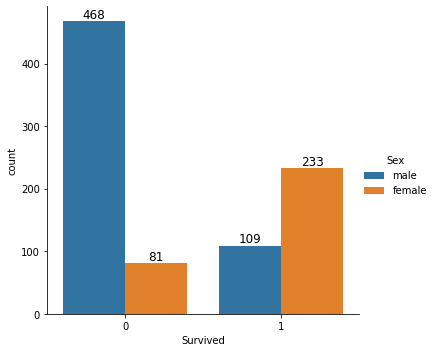

In [14]:
g = sns.factorplot(x="Survived", data=data_cleaned, kind="count", hue='Sex')
plt.title('')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

#### Question 2

In [15]:
def pclass_survival_rate(pclass):
    
    pclass_1 = data_cleaned.groupby(['Pclass','Survived']).size()[1,1]
    pclass_2 = data_cleaned.groupby(['Pclass','Survived']).size()[2,1]
    pclass_3 = data_cleaned.groupby(['Pclass','Survived']).size()[3,1]
    survived = len(data_cleaned[data_cleaned['Survived'] ==1])
    pclass_1_survival_rate = ((pclass_1 / survived) * 100).round(2)
    pclass_2_survival_rate = ((pclass_2 / survived) * 100).round(2)
    pclass_3_survival_rate = ((pclass_3 / survived) * 100).round(2)
    
    return pclass_1_survival_rate, pclass_2_survival_rate, pclass_3_survival_rate

In [16]:
print(f"Class 1, Class 2, Class 3 survival rates are {pclass_survival_rate('Pclass')} percents, respectively")

Class 1, Class 2, Class 3 survival rates are (39.77, 25.44, 34.8) percents, respectively


/Applications/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


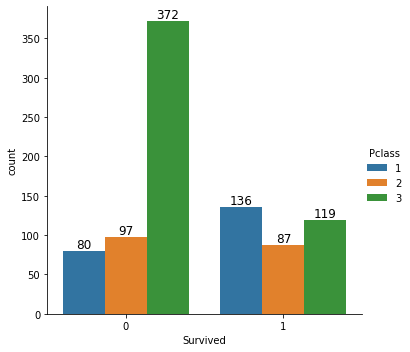

In [17]:
g = sns.factorplot(x="Survived", data=data_cleaned, kind="count", hue='Pclass')
plt.title('')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

In [18]:
def survival_rate(pclass, sex):
    
    grouped =data_cleaned.groupby(['Pclass','Survived','Sex']).size()[pclass,1,sex]
    grouped_survived = data_cleaned.groupby(['Pclass', 'Survived']).size()[pclass,1]
    survived_sex_pc = ((grouped / grouped_survived) * 100).round(2)
    return survived_sex_pc

In [19]:
groupedby_class_survived_size = data_cleaned.groupby(['Pclass','Survived','Sex']).size()
print(groupedby_class_survived_size)
print(f"Class 1 - female survival rate is {survival_rate(1, 'female')}%")
print(f"Class 1 - male survival rate is {survival_rate(1, 'male')}%")
print('----------------------------------------')
print(f"Class 2 - female survival rate is {survival_rate(2, 'female')}%")
print(f"Class 2 - male survival rate is {survival_rate(2, 'male')}%")
print('----------------------------------------')
print(f"Class 3 - female survival rate is {survival_rate(3, 'female')}%")
print(f"Class 3 - male survival rate is {survival_rate(3, 'male')}%")

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64
Class 1 - female survival rate is 66.91%
Class 1 - male survival rate is 33.09%
----------------------------------------
Class 2 - female survival rate is 80.46%
Class 2 - male survival rate is 19.54%
----------------------------------------
Class 3 - female survival rate is 60.5%
Class 3 - male survival rate is 39.5%


/Applications/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


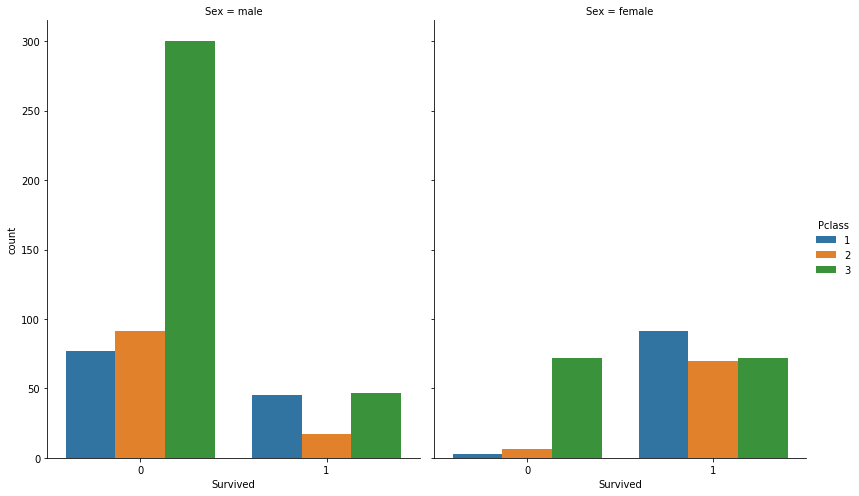

In [20]:
sns.factorplot('Survived', col='Sex', hue='Pclass', data=data_cleaned, kind='count', size=7, aspect=.8)

#### Question 3

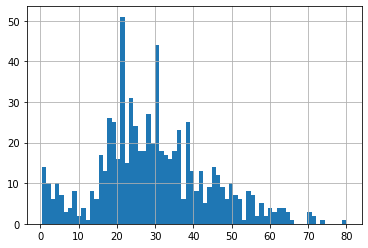

In [21]:
data_cleaned['Age'].hist(bins=70)

In [23]:
min_age_survived = data_age_cleaned[data_age_cleaned['Survived'] == True]['Age'].min()
min_age_died = data_age_cleaned[data_age_cleaned['Survived'] == False]['Age'].min()
max_age_survived = data_age_cleaned[data_age_cleaned['Survived'] == True]['Age'].max()
max_age_died = data_age_cleaned[data_age_cleaned['Survived'] == False]['Age'].max()

In [24]:
print(f"Younget person survived: {min_age_survived}\nYounget person died: {min_age_died}\
      \nOldest person survived: {max_age_survived}\nOldest person died: {max_age_died}")

Younget person survived: 0.42
Younget person died: 1.0      
Oldest person survived: 80.0
Oldest person died: 74.0


In [25]:
def adult_child(passenger):

    age,sex = passenger

    if age < 18:
        return 'child'
    else:
        return sex

In [26]:
data_age_cleaned['Person']= data_age_cleaned[['Age','Sex']].apply(adult_child, axis=1)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
print(data_age_cleaned.groupby(['Person','Survived']).size())

Person  Survived
child   0            52
        1            61
female  0            47
        1           159
male    0           325
        1            70
dtype: int64


In [28]:
def person_survival_rate(person):
    
    child_survived = data_age_cleaned.groupby(['Person','Survived']).size()['child',1]
    female_survived = data_age_cleaned.groupby(['Person','Survived']).size()['female',1]
    male_survived = data_age_cleaned.groupby(['Person','Survived']).size()['male',1]
    survived = len(data_age_cleaned[data_age_cleaned['Survived'] ==1])
    child_survival_rate = ((child_survived / survived) * 100).round(2)
    female_survival_rate = ((female_survived / survived) * 100).round(2)
    male_survival_rate = ((male_survived / survived) * 100).round(2)
    
    return child_survival_rate, female_survival_rate, male_survival_rate

In [29]:
print(f"Child, Female and Male survivle rates are {person_survival_rate(['Person'])}, respectively")

Child, Female and Male survivle rates are (21.03, 54.83, 24.14), respectively


/Applications/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


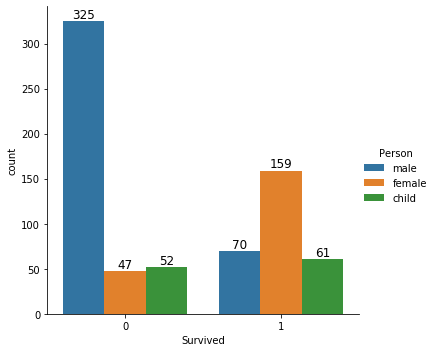

In [30]:
g = sns.factorplot(x="Survived", data=data_age_cleaned, kind="count", hue='Person')
plt.title('')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

#### Question 4

In [31]:
data_cleaned['Alone-Not'] = data_cleaned['SibSp'] + data_cleaned['Parch']

In [32]:
data_cleaned['Alone-Not'].loc[data_cleaned['Alone-Not'] >0] = 'With Family'
data_cleaned['Alone-Not'].loc[data_cleaned['Alone-Not'] == 0] = 'Alone'

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [33]:
def alone_survival_rate(alone_not):
    
    alone_survived = data_cleaned.groupby(['Alone-Not','Survived']).size()['Alone',1]
    family_survived = data_cleaned.groupby(['Alone-Not','Survived']).size()['With Family',1]
    survived = len(data_cleaned[data_cleaned['Survived'] ==1])
    alone_survival_rate = ((alone_survived / survived) * 100).round(2)
    family_survival_rate = ((family_survived / survived) * 100).round(2)
    
    return alone_survival_rate, family_survival_rate

In [34]:
print(f"The number of Alone and With-Family people survival rates are {alone_survival_rate('Alone-Not')} percents, respectively")

The number of Alone and With-Family people survival rates are (47.66, 52.34) percents, respectively


/Applications/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


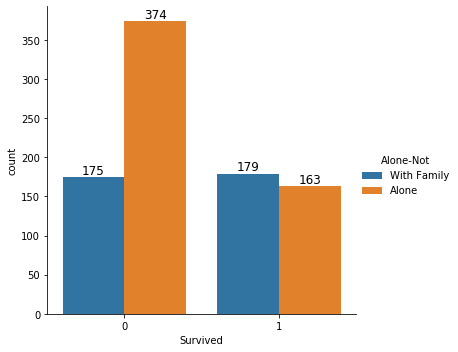

In [35]:
g = sns.factorplot(x="Survived", data=data_cleaned, kind="count", hue='Alone-Not')
plt.title('')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

## Conclusion

Our Analysis on Titanic dataset demonstrates these results below:
* The percentage of Female survived in the disaster were more than men.
* First passenger class had more survival relative to other two classes. Moreover in three classes the rate of     women survival were more than men.
* The number of women over 18-years-old were more than younger people.So, it does not seem that age is a main       factor.
* The number of people with family survived were more than alone people.
    